In [7]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict

In [17]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    catagory: str

In [6]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state

In [19]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        state['catagory'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['catagory'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['catagory'] = 'Overweight'
    else:
        state['catagory'] = 'Obesity'
    
    return state

In [20]:
#define your graph

graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('Calculate BMI', calculate_bmi)
graph.add_node('label_bmi' , label_bmi)

#add edges to your graph
graph.add_edge(START, "Calculate BMI")
graph.add_edge("Calculate BMI", "label_bmi")
graph.add_edge("label_bmi", END)

#compile your graph
workflow = graph.compile()

#execute your graph
initial_state = {'weight_kg': 70, 'height_m': 1.75}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'catagory': 'Normal weight'}


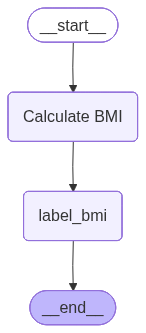

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())